In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
df = pd.read_csv(os.getcwd()+"/data/url_original.csv")

In [6]:
df.head()

,domain,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1.0
3,mail.printakid.com/www.online.americanexpress....,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,1.0


In [7]:
def initial_read(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [8]:
initial_read(df)

SHAPE
(96005, 2)
=====
DTYPES
domain     object
label     float64
dtype: object
=====
NULL VALUES
domain     0
label     92
dtype: int64
=====


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

domain    0
label     0
dtype: int64

In [11]:
df['label'] = df['label'].astype(int)
df.dtypes

domain    object
label      int32
dtype: object

In [12]:
df.rename(columns={"domain": "url", "label": "phishing"}, inplace=True)

In [13]:
df['url'] = 'https://' + df['url'].astype(str)

In [14]:
df.head()

,url,phishing
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1
3,https://mail.printakid.com/www.online.american...,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1


In [15]:
initial_read(df)

SHAPE
(95913, 2)
=====
DTYPES
url         object
phishing     int32
dtype: object
=====
NULL VALUES
url         0
phishing    0
dtype: int64
=====


In [16]:
df.to_csv(os.getcwd()+'/data/url_concatenated.csv', index=False)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [18]:
df.head()

,url,phishing
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1
3,https://mail.printakid.com/www.online.american...,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1


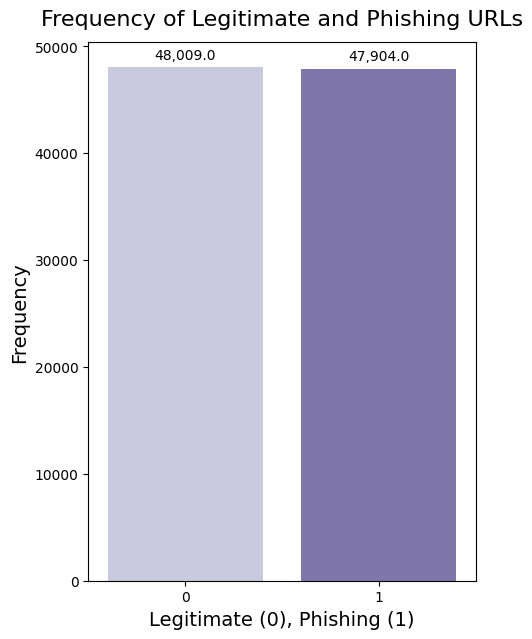

In [19]:
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=df["phishing"], 
              data=df, 
              palette="Purples")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

In [20]:
import urllib
from urllib.parse import urlparse

In [21]:
urls = [url for url in df['url']]

In [22]:
df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [23]:
df.head()

,url,phishing,protocol,domain,path,query,fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,,
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,


In [24]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

In [25]:
get_features(df)

In [26]:
df[20:30]

,url,phishing,protocol,domain,path,query,fragment,url_length,qty_dot_url,qty_hyphen_url,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
20,https://www.regaranch.info/grafika/file/2012/a...,1,https,www.regaranch.info,/grafika/file/2012/atualizacao/www.itau.com.br/,,,73,5,0,...,0,0,0,0,0,0,0,0,0,0
21,https://optimistic-pessimism.com/aoluserupdate...,1,https,optimistic-pessimism.com,/aoluserupdatealert.info.htm,,,60,3,1,...,0,0,0,0,0,0,0,0,0,0
22,https://mercadolivre.com.br.premiosfidelidade2...,1,https,mercadolivre.com.br.premiosfidelidade2012.com.br,/confirmar/,,,67,5,0,...,0,0,0,0,0,0,0,0,0,0
23,https://www.everythinggoingon.net/~gpeveryt/ho...,1,https,www.everythinggoingon.net,/~gpeveryt/home/Email/,,,55,2,0,...,0,0,0,0,0,0,0,0,0,0
24,https://mercadolivre.com.br.premiosfidelidade2...,1,https,mercadolivre.com.br.premiosfidelidade2012.com.br,/,,,57,5,0,...,0,0,0,0,0,0,0,0,0,0
25,https://www.revitolcream.org/wp-content/plugin...,1,https,www.revitolcream.org,/wp-content/plugins/all-in-one-seo-pack/rex/se...,,,95,2,6,...,0,0,0,0,0,0,0,0,0,0
26,https://jameshowardmusic.com/wp-content/themes...,1,https,jameshowardmusic.com,/wp-content/themes/widescreen/includes/cache/b...,,,85,2,1,...,0,0,0,0,0,0,0,0,0,0
27,https://xini.eu/00Qe,1,https,xini.eu,/00Qe,,,20,1,0,...,0,0,0,0,0,0,0,0,0,0
28,https://myxxxcollection.com/v1/js/555klisdr/bp...,1,https,myxxxcollection.com,/v1/js/555klisdr/bpd.com.do/do/l.popular.php,,,71,5,0,...,0,0,0,0,0,0,0,0,0,0
29,https://paypal.com.cgi.bin.webscr.cmd.login.su...,1,https,paypal.com.cgi.bin.webscr.cmd.login.submit.dis...,/secure-code90/security/,,,143,11,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
num_cols = df.select_dtypes(exclude='object')
num_cols

,phishing,url_length,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
0,1,233,6,4,12,1,4,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1,89,5,2,6,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,185,7,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,68,6,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,124,1,1,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,0,47,3,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96001,0,52,2,2,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96002,0,50,2,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96003,0,53,2,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
i=0
for col in num_cols:

    column_name = col.title().replace('_', ' ')
    title =str(i)+'. Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['phishing'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"5"})
    plt.xlabel(column_name, fontsize = 12)
    plt.ylabel('Phishing URL (Binary)', fontsize = 12)
    plt.title(title, fontsize = 14, pad = 10)
    plt.show()
    i+=1

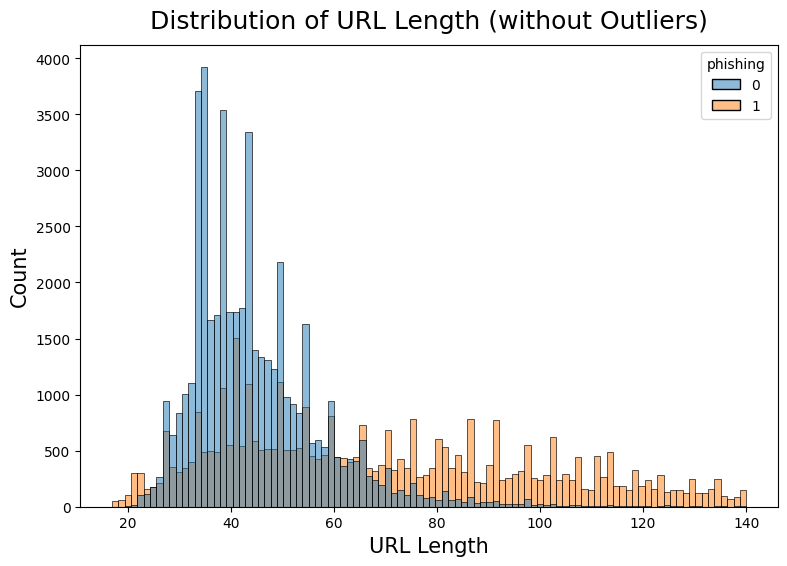

In [29]:
Q1 = df['url_length'].quantile(0.25)
Q3 = df['url_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_url_length = df[(df['url_length']> lower_bound)]
filtered_url_length = df[(df['url_length']< upper_bound)]

plt.figure(figsize=(9,6))
sns.histplot(data=filtered_url_length, x="url_length", hue = 'phishing', bins = 100)
plt.title('Distribution of URL Length (without Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

<AxesSubplot: >

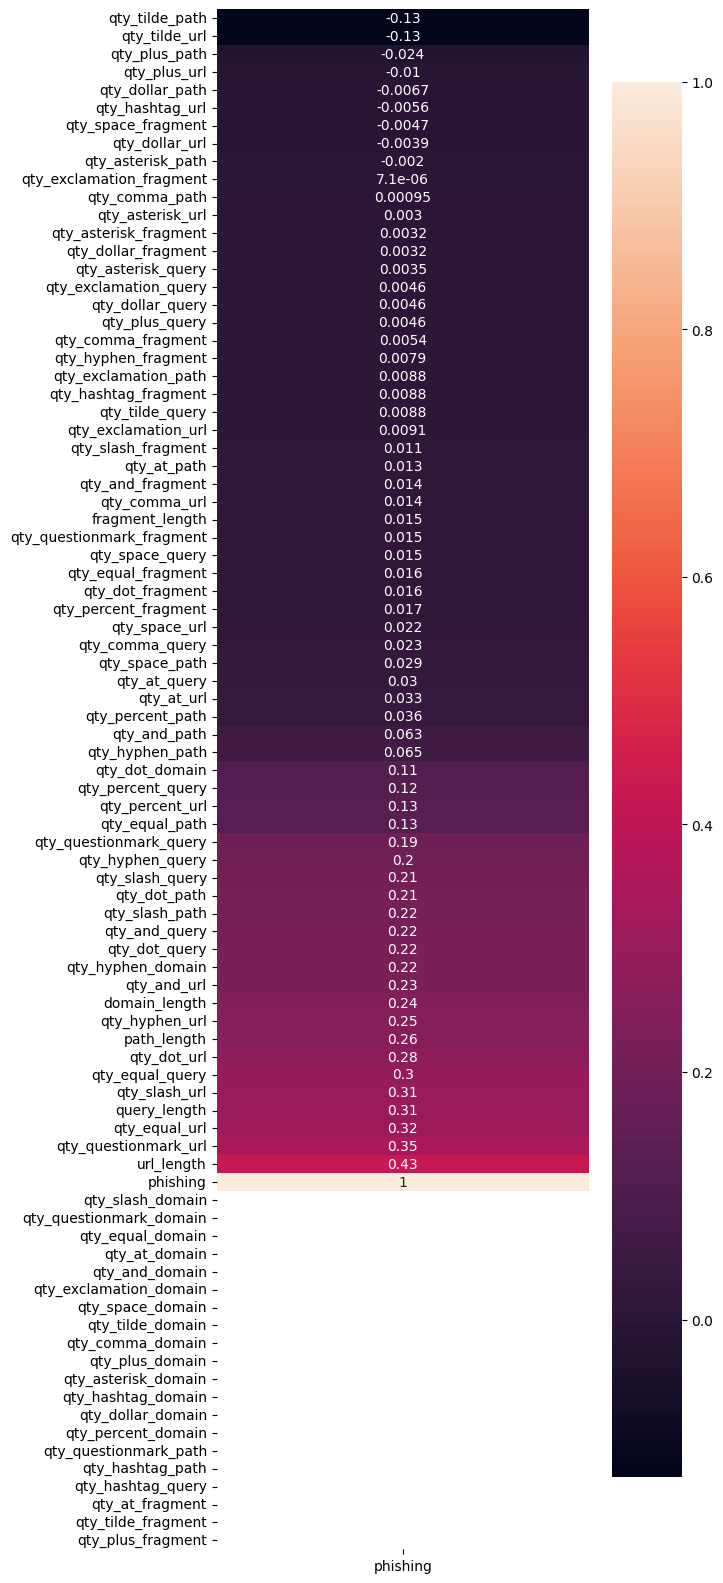

In [30]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['phishing']].sort_values('phishing', ascending=True), annot=True)

In [31]:
col_in_question = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain', 
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path', 
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_plus_fragment']

for col in col_in_question:
    print(df[col].value_counts())

0    95913
Name: qty_slash_domain, dtype: int64
0    95913
Name: qty_questionmark_domain, dtype: int64
0    95913
Name: qty_equal_domain, dtype: int64
0    95913
Name: qty_at_domain, dtype: int64
0    95913
Name: qty_and_domain, dtype: int64
0    95913
Name: qty_exclamation_domain, dtype: int64
0    95913
Name: qty_space_domain, dtype: int64
0    95913
Name: qty_tilde_domain, dtype: int64
0    95913
Name: qty_comma_domain, dtype: int64
0    95913
Name: qty_plus_domain, dtype: int64
0    95913
Name: qty_asterisk_domain, dtype: int64
0    95913
Name: qty_hashtag_domain, dtype: int64
0    95913
Name: qty_dollar_domain, dtype: int64
0    95913
Name: qty_percent_domain, dtype: int64
0    95913
Name: qty_questionmark_path, dtype: int64
0    95913
Name: qty_hashtag_path, dtype: int64
0    95913
Name: qty_hashtag_query, dtype: int64
0    95913
Name: qty_at_fragment, dtype: int64
0    95913
Name: qty_tilde_fragment, dtype: int64
0    95913
Name: qty_plus_fragment, dtype: int64


In [32]:
df.drop(columns = col_in_question, inplace=True)

In [33]:
df.to_csv(os.getcwd()+'/data/url_updated.csv', index=False)

In [34]:
df['phishing'].value_counts(normalize=True)

0    0.500547
1    0.499453
Name: phishing, dtype: float64

In [36]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [37]:
import random
random.seed(42)

In [38]:
X = df.drop(columns=['url', 'protocol', 'domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y )

In [39]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

Model Selection

In [40]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [41]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [42]:
get_scores_sc(SGDClassifier)

SGDClassifier() Training Score: 0.7990519086940807
SGDClassifier() Testing Score: 0.7932774511030485

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     12003
           1       0.85      0.72      0.78     11976

    accuracy                           0.79     23979
   macro avg       0.80      0.79      0.79     23979
weighted avg       0.80      0.79      0.79     23979

[[10438  1565]
 [ 3392  8584]]


In [43]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.7967164345094114
LogisticRegression() Testing Score: 0.7918595437674631

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     12003
           1       0.85      0.71      0.77     11976

    accuracy                           0.79     23979
   macro avg       0.80      0.79      0.79     23979
weighted avg       0.80      0.79      0.79     23979

[[10502  1501]
 [ 3490  8486]]


In [44]:
get_scores_sc(KNeighborsClassifier)

KNeighborsClassifier() Training Score: 0.9154502738621514
KNeighborsClassifier() Testing Score: 0.8865674131531757

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12003
           1       0.91      0.86      0.88     11976

    accuracy                           0.89     23979
   macro avg       0.89      0.89      0.89     23979
weighted avg       0.89      0.89      0.89     23979

[[10962  1041]
 [ 1679 10297]]


In [45]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.9523869102232602
DecisionTreeClassifier() Testing Score: 0.8823136911464198

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     12003
           1       0.91      0.85      0.88     11976

    accuracy                           0.88     23979
   macro avg       0.88      0.88      0.88     23979
weighted avg       0.88      0.88      0.88     23979

[[10963  1040]
 [ 1782 10194]]


In [46]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9523869102232602
RandomForestClassifier() Testing Score: 0.896075732932983

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12003
           1       0.92      0.87      0.89     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11036   967]
 [ 1525 10451]]


In [47]:
rfc = RandomForestClassifier()
rfc_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params, cv = 3, verbose=2, random_state=42, 
                                n_jobs = -1)
rfc_random.fit(X_train, y_train)
print(f'Best Parameters: {rfc_random.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


Training Score: 0.9204965662968833
Testing Score: 0.8991617665457275

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12003
           1       0.93      0.86      0.89     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11267   736]
 [ 1682 10294]]


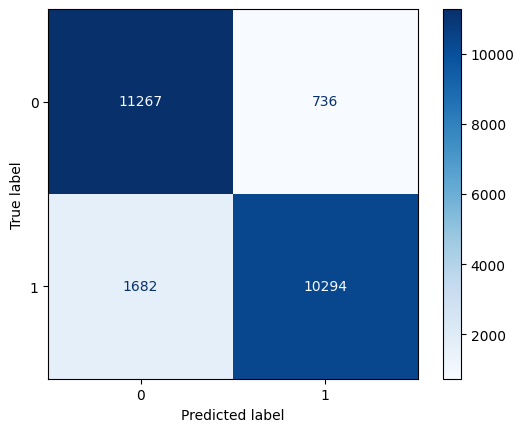

In [48]:
rfc = RandomForestClassifier(n_estimators = 600, min_samples_split= 5, min_samples_leaf= 2, max_features= 'auto', max_depth= 40, 
                             bootstrap= True, n_jobs= -1, random_state=42)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Blues', values_format='')

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.8991617665457275
Misclassification Rate:  0.1008382334542725
Recall:  0.8595524382097528
Specificity:  0.9386819961676247
Precision:  0.9332728921124207


In [50]:
import pickle

In [51]:
pickle.dump(rfc, open(os.getcwd()+'/rfc.pkl','wb'))

In [54]:
id=int(random.random()*(X_test.shape[0]))

print(X_test.iloc[id],"\n...........\n","\nExpexted: ",y_test.iloc[id])

preds = rfc.predict([X_test.iloc[id]])

if preds[0]==1:
    print("predicted: IS A PHISHING LINK.")
else:
    print("predicted: IS A TRUSTABLE LINK.")

url_length               64
qty_dot_url               5
qty_hyphen_url            0
qty_slash_url             7
qty_questionmark_url      0
                         ..
qty_comma_fragment        0
qty_asterisk_fragment     0
qty_hashtag_fragment      0
qty_dollar_fragment       0
qty_percent_fragment      0
Name: 8076, Length: 65, dtype: int64 
...........
 
Expexted:  1
predicted: IS A PHISHING LINK.


In [53]:
# X_test.shape[0]

23979